In [1]:
import sys; 
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join

print("loading data ...")
grouped = load_pickle('../processed/cifar10/resnets/group.pkl')
scores = load_pickle('../processed/cifar10/resnets/scores.pkl')
print("done")


# Test sets in this data
test_sets = ["CIFAR10_test", "CIFAR10v2_test", "CINIC10_test"]
# name of training dataset
train_set = "CIFAR10_train"


print("loading dataset ...")
dataset = {}
labels = {}

for name in test_sets: 
    dataset[name] = get_dataset('../data', name)
    labels[name] = np.array(dataset[name].targets)
print("done")



loading data ...
done
loading dataset ...
Files already downloaded and verified
done


In [13]:
classes = cifar10_label_names

# Dataset name
name=test_sets[2]
arch = "Resnet18"

# Plots params 
fmts = {
    "Resnet18": "bo",
    "Densenet121": "ro",
    "Resnet18-pretrained": "c^",
    "Densenet121-pretrained": "m^",
    "ClipViTB32": "go",
}

alpha = 0.5
markersize = 12
    
# CINIC Neg stats


# def aggregate_scores(dct):
#     x = dct["x"]
#     return dct["x"], np.mean(dct["points"], axis = 0)
   
def aggregate_scores(dct, idx): 
    x = dct["x"]
    return dct["x"], np.mean(dct["points"][idx], axis = 0)


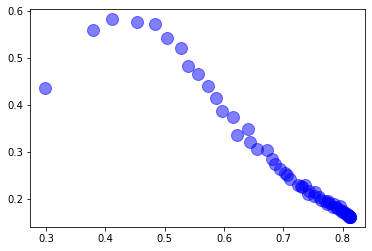

In [25]:
n = 2000 # Vary n to vary the neg correlation behaviour. Overall n = 90000 gives accuracy on line and n = 10000 gives neg correlation. 

idx = scores[name]["idx"][:n].astype(int)

dct = grouped[name][arch]

x, y = aggregate_scores(dct, idx)

plt.plot(x, y, fmts[arch], alpha=alpha, markersize=markersize, label=arch)